# Ghost, Goblins & Ghouls competion

In [387]:
import pandas as pd
import numpy as np
import pylab as P
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Import data

In [388]:
df = pd.read_csv('./train.csv')
df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


Splitting Dataset into $X_{train}$, $y_{train}$, $X_{test}$, $y_{test}$

In [390]:
X = df.drop(['id', 'type'], axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.33)
X_train.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color
247,0.269748,0.627138,0.195365,0.367902,blue
111,0.476730,0.242420,0.294214,0.317795,black
123,0.505375,0.327578,0.650431,0.528015,green
322,0.217248,0.498718,0.331531,0.523283,white
244,0.391036,0.506061,0.252296,0.347765,black


In [391]:
def formatX(X, poly):
    colors = pd.get_dummies(X['color'])
    X = poly.fit_transform(X.drop(['color'], axis=1).values)
    X = pd.concat([pd.DataFrame(X), pd.DataFrame(colors.values)], axis=1)
    return X

def formatY(y):
    return np.sum(np.array(pd.get_dummies(pd.DataFrame(y)['type']).values)*np.array([1, 2, 3]), axis=1)

def performLogisticRegression(X_train, y_train, alpha, poly):
    logreg = LogisticRegression(C=alpha)
    logreg.fit(formatX(X_train, poly), formatY(y_train))
    return logreg

def predict(model, X_test, poly):
    return model.predict(formatX(X_test, poly))

In [392]:
degrees = np.linspace(1, 10, 10)
alphas = np.arange(1000, 10100, 1000)
degrees, alphas

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000, 10000]))

In [393]:
results = []
for alpha in alphas:
    scores = []
    for d in degrees:
        poly = PolynomialFeatures(int(d))
        model = performLogisticRegression(X_train, y_train, alpha, poly)
        y_predict = predict(model, X_test, poly)
        scores.append(model.score(formatX(X_test, poly), formatY(y_test)))
    results.append(scores)
print(results)

[[0.73170731707317072, 0.73983739837398377, 0.73983739837398377, 0.74796747967479671, 0.75609756097560976, 0.73983739837398377, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671], [0.73170731707317072, 0.73983739837398377, 0.73983739837398377, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671, 0.73983739837398377, 0.73170731707317072, 0.73983739837398377], [0.73170731707317072, 0.73983739837398377, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671, 0.73983739837398377, 0.73983739837398377, 0.73170731707317072, 0.73170731707317072, 0.73170731707317072], [0.73170731707317072, 0.73983739837398377, 0.74796747967479671, 0.74796747967479671, 0.74796747967479671, 0.73983739837398377, 0.73170731707317072, 0.73170731707317072, 0.73983739837398377, 0.73170731707317072], [0.73170731707317072, 0.73983739837398377, 0.74796747967479671, 0.74796747967479671, 0.73983739837398377, 0.73170731707317072, 0.73170731707317072, 0.7

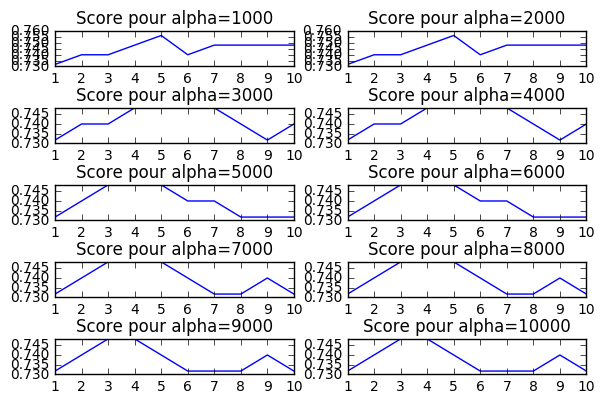

In [394]:
f, axarr = plt.subplots(len(alphas)//2, 2)
f.tight_layout()
for i in range(len(alphas)//2):
    for j in range(2):
        axarr[i, j].plot(degrees, results[i])
        title = 'Score pour alpha=' + str(alphas[2*i+j])
        axarr[i, j].set_title(title)
plt.show()

In [401]:
results = np.array(results)
a, b = np.unravel_index(results.argmax(), results.shape)

4

In [402]:
degree = int(degrees[b])
alpha = alphas[a]
poly = PolynomialFeatures(degree)
model = performLogisticRegression(X_train, y_train, alpha, poly)
y_predict = predict(model, X_test, poly)
model.score(formatX(X_test, poly), formatY(y_test))

0.75609756097560976

In [397]:
#Ghost = 1 #Ghoul = 2 # Goblin = 3
types = {1: 'Ghost', 2: 'Ghoul', 3: 'Goblin'}

In [416]:
df_test = pd.read_csv('./test.csv')
y_predict = predict(model, df_test.drop(['id'], axis=1), poly)

In [421]:
df_predictions = pd.DataFrame({'id': df_test['id'] , 'type': y_predict})
df_predictions['type'] = df_predictions['type'].apply(lambda type: types[type])
df_predictions.head(10)
df_predictions.to_csv('out.csv', index=False)